In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

def plot_COVID(region: str, *args):
    """
    args is a tuple of column names to be plotted
    e.g
    plot_COVID("Piemonte",'totale_casi','deceduti')
    will plot the overall daily results for 'totale_casi','deceduti' in Piemonte
    
    An additional column 'nuovi_casi' has been added.
    """

# The keys of the dictionary 'col' are the vailable columns (strings). The values are the colors for plotting 
    col={'ricoverati_con_sintomi':'C0',
         'terapia_intensiva':'C1',
         'totale_ospedalizzati':'C2',
         'isolamento_domiciliare':'C3',
         'totale_attualmente_positivi':'C4',
         'nuovi_attualmente_positivi':'C5',
         'dimessi_guariti':'C6',
         'deceduti':'C7',
         'totale_casi':'0',
         'tamponi':'C9',
         'nuovi_casi':'C8'}
    
# Load the data from the official repository. Notice that you need to download the file in 'raw' format non in html.
# The output in a pandas Dataframe. You can print it out.
    if region=="ita":
        TotalByDate=pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
    else:
        TotalByDate=pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")
        TotalByDate=TotalByDate.loc[lambda df: df['denominazione_regione']==region,:]
        # fix indices to be [0,1,.........,len(TotalByDate)-1]
        TotalByDate['entry']=list(range(len(TotalByDate)))
        TotalByDate.set_index('entry',inplace=True)

# Add column 'nuovi_casi'
    TotalByDate['nuovi_casi']=[0]+[TotalByDate['totale_casi'][i]-TotalByDate['totale_casi'][i-1] for i in range(1,len(TotalByDate))]

# Retrieve and format the x-axis labels
    xx=list(TotalByDate['data'])
    xx=[d[5:10].replace('02-','Feb ').replace('03-','Mar ')  for d in xx]

# Create the figure object
    fig1,ax1 = plt.subplots(figsize=(12,16))

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(70)
        label.set_fontsize(14)

# Set and Format title
    if region=="ita":
        title="Italia "+xx[0]+"-"+xx[-1]
    else:
        title=region+" "+xx[0]+"-"+xx[-1]
            
    ax1.set_title(title,fontsize='28',pad=30)

# Set log scale on y-axis
    ax1.set_yscale('log')
# Set range on y-axis
    ax1.set_ylim(5,50000)
# Set width of the curves
    lwidth=3
# Turn on grid
    ax1.grid(b=True,which='both')
    
# Define and format the y-axis labels
    yticks = [10,20,40,60,80,100,200,400,600,800,1000,2000,4000,6000,8000,10000,20000,40000]
    ax1.set_yticks(yticks)
    plt.yticks(fontsize='16')
# Display as integers    
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%5d'))

# Loop on the required plots
    for name in args:
        yy=list(TotalByDate[name])
        if name == 'nuovi_casi':
            ax1.plot(xx[1:],yy[1:],color=col[name],linewidth=lwidth,label=name);
        else:
            ax1.plot(xx,yy,color=col[name],linewidth=lwidth,label=name);
        
# Add legends using the 'label' of each curve
    ax1.legend(fontsize='14');
# Save the plots in pdf and jpg format
    fig1.savefig(title+".pdf")
    fig1.savefig(title+".jpg")

    return
    

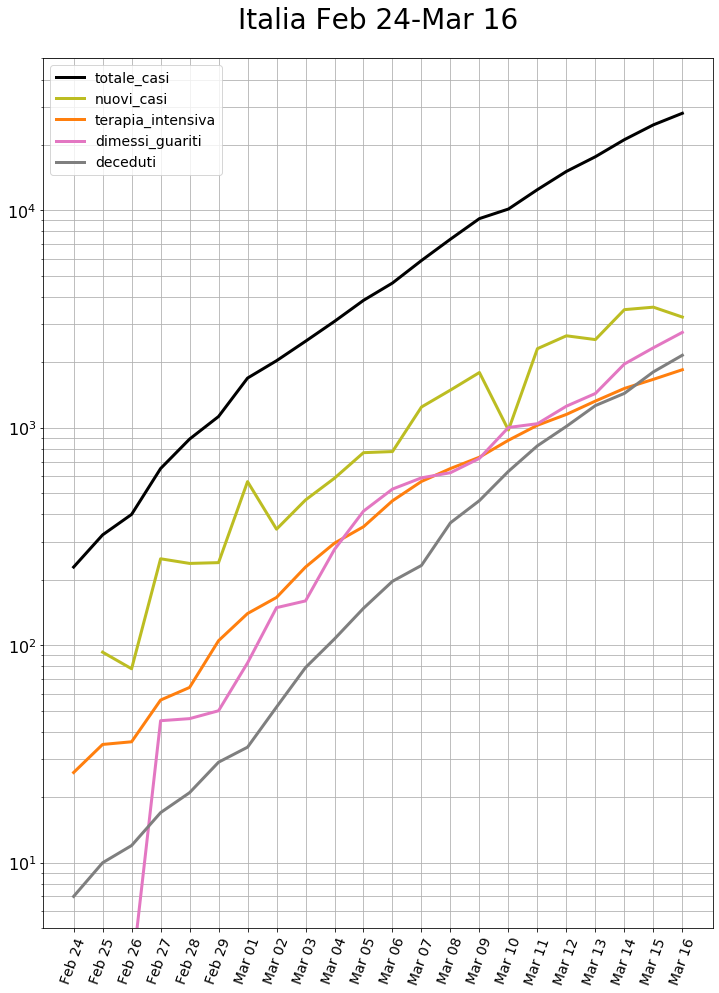

In [9]:
plot_COVID('ita','totale_casi','nuovi_casi','terapia_intensiva','dimessi_guariti','deceduti')

In [6]:
help(plot_COVID)

Help on function plot_COVID in module __main__:

plot_COVID(region: str, *args)
    args is a tuple of column names to be plotted
    e.g
    plot_COVID("Piemonte",'totale casi','deceduti')
    will plot the overall daily results for 'totale casi','deceduti' in Piemonte

